# 기초 통계량 및 통계 관련 라이브러리 소개


- NumPy: 수치 계산을 위한 핵심 라이브러리로, 배열 연산, 선형 대수, 푸리에 변환과 같은 기능을 제공합니다.

- Pandas: 데이터 조작과 분석을 위한 라이브러리로, 데이터를 쉽게 조작하고 분석하는 데 유용합니다. 데이터프레임(DataFrame)과 시리즈(Series)라는 자료구조를 제공합니다.

- SciPy: 과학 기술 계산을 위한 라이브러리로, 최적화, 선형 대수, 통계 분석, 수치적 통합 등의 기능을 제공합니다.

- StatsModels: 통계 분석과 추정, 회귀 분석, 시계열 분석을 위한 라이브러리입니다.

- Scikit-learn: 머신러닝을 위한 라이브러리로, 분류, 회귀, 군집화, 차원 축소 등 다양한 머신러닝 알고리즘을 제공합니다.

In [4]:
import numpy as np
import scipy as sp # 과학 계산용 파이썬 모듈
import scipy.stats as stats
import pandas as pd

In [5]:
#numpy 사용
x = [1, 2, 10, 43, 22, 87, 52, 11, 8, 36, 25, 5, 16]

print('데이터 수 :', len(x)) # 갯수
print('평균 : ', np.mean(x)) # 평균
print('분산 : ', np.var(x)) # 분산
print('표준편차 : ', np.std(x)) # 표준 편차
print('최댓값 : ', np.max(x)) # 최댓값
print('최솟값 : ', np.min(x)) # 최솟값
print('중앙값 : ', np.median(x)) # 중앙값
print('1사분위 수 : ', np.percentile(x, 25)) # 1사분위 수
print('2사분위 수 : ', np.percentile(x, 50)) # 2사분위 수
print('3사분위 수 : ', np.percentile(x, 75)) # 3사분위 수

데이터 수 : 13
평균 :  24.46153846153846
분산 :  563.0177514792898
표준편차 :  23.727995100287966
최댓값 :  87
최솟값 :  1
중앙값 :  16.0
1사분위 수 :  8.0
2사분위 수 :  16.0
3사분위 수 :  36.0


In [124]:
a = [3, 5, 8, 11, 13]
b = [1, 2, 3, 4, 5]

np.corrcoef(a, b)

array([[1.        , 0.99705449],
       [0.99705449, 1.        ]])

In [6]:
# scipy 사용
print(stats.describe(x))

DescribeResult(nobs=13, minmax=(np.int64(1), np.int64(87)), mean=np.float64(24.46153846153846), variance=np.float64(609.9358974358972), skewness=np.float64(1.3313727639226938), kurtosis=np.float64(1.0922300461505472))


In [7]:
# 예시 데이터 생성
data = {
    'A': [23, 45, 56, 67, 32],
    'B': [17, 28, 39, 49, 55],
    'C': [9, 10, 11, 12, 13]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 기초 통계량 분석
df.describe()

,A,B,C
count,5.000000,5.000000,5.000000
mean,44.600000,37.600000,11.000000
std,17.728508,15.420765,1.581139
min,23.000000,17.000000,9.000000
25%,32.000000,28.000000,10.000000
50%,45.000000,39.000000,11.000000
75%,56.000000,49.000000,12.000000
max,67.000000,55.000000,13.000000


In [10]:
df['A'].mean()

np.float64(44.6)

In [11]:
df['B'].std()

np.float64(15.42076522096099)

In [12]:
df['C'].max()

np.int64(13)

# Estimating mean : confidence interval estimation

### 어느 여자고등학교에서 학생들의 평균키를 알아보려고 한다. 그래서 무작위로 학생 50명을 뽑아 키를 측정하였더니, 평균은 159.41cm가 나왔다. 그럼 모표준펀차는 26cm라고 가정했을 때, 여학생의 평균키에 대한 95% 신뢰구간을 구하시오. (모분산 안다고 가정할 때)

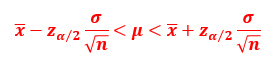

In [147]:
sample_mean = 159.41  # 표본 평균
population_std = 26  # 모표준편차
sample_size = 50  # 표본 크기
confidence_level = 0.95  # 신뢰수준

# Z-score 계산
z_score = stats.norm.ppf((1 + confidence_level) / 2)
print(z_score)

# 신뢰구간 계산
margin_of_error = z_score * (population_std / (sample_size ** 0.5))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"평균 키의 90% 신뢰구간: ({lower_bound:.2f}cm, {upper_bound:.2f}cm)")

1.959963984540054
평균 키의 90% 신뢰구간: (152.20cm, 166.62cm)


### 어느 남자 고등학교에서 학생들의 평균 체중을 알아보기 위하여, 무작위로 31명을 뽑아 체중을 측정하였더니, 평균은 64kg이 나오고 표준편차는 5.3kg이 나왔다. 이때 평균 체중에 대한 90%의 신뢰구간을 구하시오. (모분산 모른다고 가정할 때)

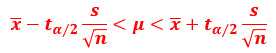

In [131]:
from scipy import stats

# 주어진 값
sample_mean = 64  # 표본 평균
sample_std = 5.3  # 표본 표준편차
sample_size = 20  # 표본 크기
confidence_level = 0.9  # 신뢰수준

# 신뢰구간 계산
confidence_interval = stats.t.interval(confidence_level, df=sample_size - 1, loc=sample_mean, scale=sample_std / (sample_size ** 0.5))

print(f"평균 체중의 90% 신뢰구간: ({confidence_interval[0]:.2f}kg, {confidence_interval[1]:.2f}kg)")

평균 체중의 90% 신뢰구간: (61.95kg, 66.05kg)


# Estimating the Differences between two means : interval estimation

### 스마트폰을 생산하는 A와 B 두 회사가 있는데, 두 회사에서 생산하는 스마트폰의 평균수명이 얼마나 차이 나는지를 비교하려고 한다. 그래서 각각 35개와 40개의 표본을 뽑았더니, 평균수명은 각각 750일과 700일이 나왔고, 각 회사의 과거 데이터를 분석해보니 모분산은 각각 40일과 45일이라고 한다. 이때 두 스마트폰의 평균수명의 차이에 대한 95%의 신뢰구간을 구하시오. (모분산 알 때)

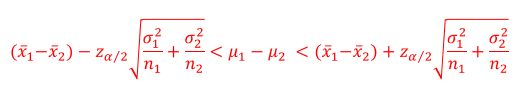

In [132]:
# 두 집단 평균 차이 신뢰 구간, 정규분포, 모분산 알 때
# 각 집단의 표본 크기, 평균, 분산
n1, mean1, variance1 = 35, 750, 40
n2, mean2, variance2 = 40, 700, 45

confidence_level = 0.95

# 두 집단의 평균 차이
mean_diff = mean1 - mean2

# 두 집단의 분산
variance_diff = np.sqrt(variance1 / n1 + variance2 / n2)

# 신뢰 구간 계산 (Z-분포 사용)
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * variance_diff  # 95% 신뢰수준에서의 Z-값은 1.96
lower_bound = mean_diff - margin_of_error
upper_bound = mean_diff + margin_of_error

print(f"두 스마트폰의 평균수명 차이의 {confidence_level*100}% 신뢰 구간은 [{lower_bound}, {upper_bound}]")

두 스마트폰의 평균수명 차이의 95.0% 신뢰 구간은 [47.04841062722086, 52.95158937277914]


### 우유를 생산하는 두 회사 A와 B가 있는데, 두 회사 우유의 평균용량이 얼마나 차이 나는지를 비교하려고 한다. 그래서 각각 15개와 25개의 우유를 표본으로 뽑아서 조사하였더니, 평균용량은 250ml, 210ml가 나왔고, 표본분산은 13ml와 9ml가 나왔다고한다. 이때 두 회사 우유의 평균용량 차이에 대한 99%의 신뢰구간을 구하시오. (모분산 모를 때)

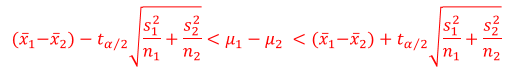

In [133]:
# 각 집단의 표본 크기, 평균, 표준편차
n1, mean1, std_dev1 = 15, 250, 13
n2, mean2, std_dev2 = 25, 210, 9

# t-test를 사용한 신뢰 구간 계산
confidence_level = 0.99

# 각 집단의 자유도 계산
degrees_of_freedom1 = n1 - 1
degrees_of_freedom2 = n2 - 1

# t-test를 위한 표준 오차 계산
std_err = np.sqrt((std_dev1 / n1) + (std_dev2 / n2))

# 신뢰 구간 계산
lower_bound, upper_bound =stats.t.interval(confidence_level, degrees_of_freedom1 + degrees_of_freedom2, loc=mean1 - mean2, scale=std_err)

print(f"두 회사 우유의 평균 용량 차이의 {confidence_level*100}% 신뢰 구간은 [{lower_bound}, {upper_bound}]")

두 회사 우유의 평균 용량 차이의 99.0% 신뢰 구간은 [36.99681478910294, 43.00318521089706]


# Estimating Proportion in a Binomial experiment : interval estimation

### 우리나라 성인 남성의 흡연율을 조사하기 위해서, 성인 남자 1000명을 무작위로 뽑아 흡연 여부를 조사하였더니, 430명이 흡연을 하고 있었다. 이때 흡연율(모비율)에 대한 90%의 신뢰구간을 추정하시오.

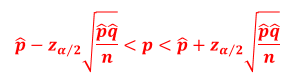

In [134]:
# 표본의 크기와 흡연하는 사람 수
n = 1000
smokers = 430

# 표본 비율 계산
p = smokers / n

# 표준 오차 계산
std_error = np.sqrt((p * (1 - p)) / n)

# 90% 신뢰구간 계산
confidence_level = 0.90
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 90% 신뢰구간의 Z값 계산
margin_of_error = z_score * std_error

# 신뢰구간 계산
lower_bound = p - margin_of_error
upper_bound = p + margin_of_error

print(f"흡연율에 대한 90%의 신뢰구간은 [{lower_bound}, {upper_bound}]")

흡연율에 대한 90%의 신뢰구간은 [0.40424871458356326, 0.4557512854164367]


# Estimation of the Differences between two proportions : interval estimation

### 어느 제조업 공장에서 제품을 생산하는 두 대의 기계 A와 B가 있는데, 각 기계에서 생산하는 제품의 불량률이 서로 얼마나 차이 나는지를 조사한다고 한다. 그래서 각 기계에서 100개와 150개의 표본을 뽑아 불량품의 개수를 체크하였더니, 각각 9개와 3개가 불량품이었다. 이때 두 기계의 불량률의 차이에 대한 90%의 신뢰구간을 추정하시오.

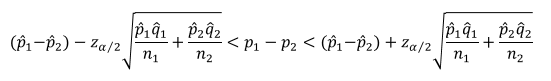

In [135]:
import numpy as np
import scipy.stats as stats

# 각 기계의 불량품 개수 및 표본 크기
defective_A, n_A = 9, 100
defective_B, n_B = 3, 150

# 각 기계의 불량률 계산
defect_rate_A = defective_A / n_A
defect_rate_B = defective_B / n_B

# 불량률의 차이
defect_rate_diff = defect_rate_A - defect_rate_B

# Z-test를 사용한 불량률의 차이에 대한 신뢰구간 계산
confidence_level = 0.90
std_error = np.sqrt((defect_rate_A * (1 - defect_rate_A) / n_A) + (defect_rate_B * (1 - defect_rate_B) / n_B))
margin_of_error = stats.norm.ppf(1 - (1 - confidence_level) / 2) * std_error

lower_bound = defect_rate_diff - margin_of_error
upper_bound = defect_rate_diff + margin_of_error

print(f"두 기계의 불량률 차이에 대한 {confidence_level*100}% 신뢰구간은 [{lower_bound}, {upper_bound}]")

두 기계의 불량률 차이에 대한 90.0% 신뢰구간은 [0.019311101476037075, 0.12068889852396292]


# Estimating variance : interval estimation

### 어느 제약회사에서 새롭게 출시하려는 알약의 효능을 테스트하고 있다. 그래서 임상실험을 통해 표본 13개를 뽑았더니 표준편차 3.2가 나왔다고 한다. 이때 알약의 모분산에 대한 95%의 신뢰구간을 구하시오.

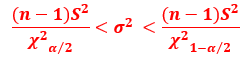

In [136]:
import scipy.stats as stats

# 주어진 값
sample_size = 13
sample_std_dev = 3.2
confidence_level = 0.95

# 자유도 계산
degrees_of_freedom = sample_size - 1

# 카이제곱 분포의 신뢰구간 계산
lower_bound = (sample_size - 1) * (sample_std_dev ** 2) / stats.chi2.ppf((1 + confidence_level) / 2, degrees_of_freedom)
upper_bound = (sample_size - 1) * (sample_std_dev ** 2) / stats.chi2.ppf((1 - confidence_level) / 2, degrees_of_freedom)

print(f"알약의 모분산에 대한 95% 신뢰구간은 [{lower_bound}, {upper_bound}]")

알약의 모분산에 대한 95% 신뢰구간은 [5.265534061108631, 27.90324735286171]


# Estimating the Ratio between two variance : interval estimation

### 감기약의 지속시간을 테스트하기 위해서 알약1과 알약2의 분산이 서로 얼마나 차이 나는지를 비교하려고 한다. 그래서 각각 표본 11개와 8개를 뽑았더니, 분산은 11과 15가 나왔다. 이때 두 알약의 모분산 차이에 대한 95%의 신뢰구간을 구하시오.

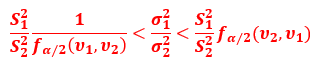

In [137]:
from scipy import stats

n1 = 11
n2 = 8
s1_sq = 11
s2_sq = 15

# F 분포의 상위 2.5%와 하위 2.5%에 해당하는 임계치를 계산합니다.
alpha= 0.05
f_upper = stats.f.ppf(1 - alpha / 2, n2 - 1, n1 - 1)
f_lower = 1 / stats.f.ppf(1 - alpha / 2, n1 - 1, n2 - 1)

# 모분산 차이에 대한 95% 신뢰구간을 계산합니다.
ci_lower = (s1_sq / s2_sq) * f_lower
ci_upper = (s1_sq / s2_sq) * f_upper

print(f"모분산 차이에 대한 95% 신뢰구간: ({ci_lower:.4f}, {ci_upper:.4f})")

모분산 차이에 대한 95% 신뢰구간: (0.1540, 2.8965)


# Single sample : test on a single mean

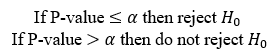

### 어느 한 건전지의 평균 수명은 300일이라고 알려져 있는데, 일부에서는 300일이 아니라는 의견이 나오고 있다. 그래서 해당 건전지 25개를 표본으로 뽑아 조사하였더니, 평균수명은 310일이 나왔고, 그동안 수집한 자료를 분석한 결과 표준편차는 30일이라고 한다. 이때 어느 의견이 더 타당한지 유의수진 5%에서 검정하시오. (모분산을 안다고 가정)

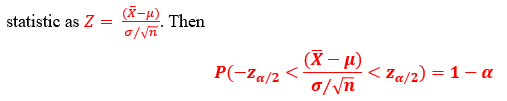

In [138]:
from scipy import stats

# 주어진 데이터
sample_mean = 310  # 표본 평균
population_mean = 300  # 모평균
sample_std = 30  # 표본 표준편차
sample_size = 25  # 표본 크기
alpha = 0.05  # 유의수준

# Z-검정 통계량 계산
z_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))

# p-value 계산 (양측 검정)
p_value = stats.norm.sf(abs(z_statistic)) * 2

# 결과 출력
print(f"Z-statistic: {z_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 유의수준과 비교하여 가설 판단
if p_value < alpha:
    print("귀무가설을 기각합니다. 건전지 평균 수명은 300일이 아닐 가능성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 건전지 평균 수명은 300일일 가능성이 있습니다.")

Z-statistic: 1.6667
p-value: 0.0956
귀무가설을 기각할 수 없습니다. 건전지 평균 수명은 300일일 가능성이 있습니다.


### 애완용으로 키우는 금붕어의 평균수명은 5년으로 알려져있는데, 일부에서는 5년이 아니라는 의견이 나왔다. 그래서 금붕어 10마리를 표본으로 뽑았더니, 평균수명은 6년이 나오고 표준편차는 3년이 나왔다. 어느 의견이 더 타당한지 유의수준 5%에서 검정하시오. (모분산을 모른다고 가정)

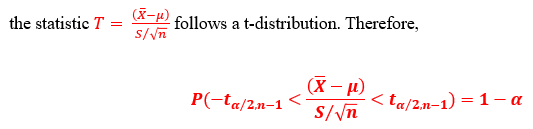

In [139]:
from scipy import stats

# 주어진 데이터
population_mean = 5  # 모평균 가설값
sample_mean = 6  # 표본 평균
sample_std = 3  # 표본 표준편차
sample_size = 10  # 표본 크기
alpha = 0.05  # 유의수준

# t-검정 통계량 계산
t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))

# p-value 계산
degrees_of_freedom = sample_size - 1
p_value = stats.t.sf(abs(t_statistic), df=degrees_of_freedom) * 2


# 결과 출력
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 결과 출력
if p_value < alpha:
    print("귀무가설을 기각합니다. 금붕어의 평균수명은 5년이 아닐 가능성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 금붕어의 평균수명은 5년이라는 주장이 유지될 수 있습니다.")

t-statistic: 1.0541
p-value: 0.3193
귀무가설을 기각할 수 없습니다. 금붕어의 평균수명은 5년이라는 주장이 유지될 수 있습니다.


### 한 가정에서 아이스크림을 만드는데, 그들은 평균적으로 하루에 500ml의 아이스크림을 생산한다고 주장한다. 이 주장을 확인하기 위해 하루 생산된 10개의 아이스크림 샘플의 용량을 조사했다. 주장된 평균 용량이 맞는지 확인하기 위해 유의수준 5%에서 가설 검정을 하시오. (모분산을 모른다고 가정)

In [140]:
import numpy as np
from scipy import stats

# 모평균, 표준편차, 표본 크기 정의
population_mean = 500
sample_std = 25
sample_size = 10

# 표본 데이터 생성 (가정된 모집단에서 표본 추출)
np.random.seed(42)  # 결과 재현을 위해 시드 설정
sample_data = np.random.normal(population_mean, sample_std, sample_size)

# t-검정 수행
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# 결과 출력
print(f"표본 데이터: {sample_data}")
print(f"t-검정 통계량: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 모평균은 500ml이 아닐 가능성이 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 모평균은 500ml일 가능성이 있습니다.")

표본 데이터: [512.41785383 496.54339247 516.19221345 538.07574641 494.14616563
 494.14657608 539.48032039 519.18586823 488.26314035 513.56400109]
t-검정 통계량: 1.9597
p-value: 0.0817
귀무가설을 기각할 수 없습니다. 모평균은 500ml일 가능성이 있습니다.


# Two samples : test on two means

### 체크카드를 사용하면 신용카드를 사용할 때보다, 카드 사용액이 더 낮아진다는 의견이 나오고 있다. 그래서 실제로 어떠한지를 알아보기 위해 각 카드사용자 55명과 60명의 카드 사용액을 조사하였더니, 체크카드의 평균 사용액은 50만원이었고, 신용카드 평균 사용액은 100만원 이었다. 그럼 체크카드의 모표준편차는 25만원이고, 신용카드의 모표준편차는 30만원이라고 가정했을 때, 체크카드를 사용하면 카드 사용액이 더 낮아진다고 할 수 있는지 유의수준 1%에서 검정하시오. (모분산을 안다고 가정)

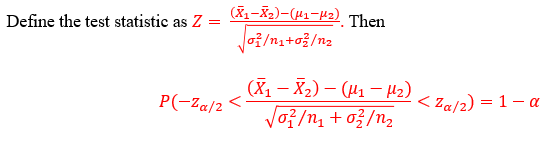

In [141]:
#모분산 알때
from scipy import stats

# 주어진 데이터
mean_check = 50  # 체크카드 평균 사용액
mean_credit = 100  # 신용카드 평균 사용액
std_check = 25  # 체크카드 모표준편차
std_credit = 30  # 신용카드 모표준편차
n_check = 55  # 체크카드 사용자 수
n_credit = 60  # 신용카드 사용자 수
alpha = 0.01  # 유의수준

# Z-검정 통계량 계산
std_error = ((std_check ** 2) / n_check + (std_credit ** 2) / n_credit) ** 0.5
z_statistic = (mean_check - mean_credit) / std_error

# p-value 계산 (단측 검정)
p_value = stats.norm.cdf(z_statistic)

# 결과 출력
print(f"Z-statistic: {z_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 유의수준과 비교하여 가설 판단
if p_value < alpha:
    print("귀무가설을 기각합니다. 체크카드를 사용하면 카드 사용액이 더 낮아진다는 주장이 타당합니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 체크카드를 사용하면 카드 사용액이 더 낮아진다는 주장을 받아들일 수 없습니다.")

Z-statistic: -9.7379
p-value: 0.0000
귀무가설을 기각합니다. 체크카드를 사용하면 카드 사용액이 더 낮아진다는 주장이 타당합니다.


### 공대생과 인문대생의 월평균독서량이 차이가 나는지를 알아보려고 한다. 그래서 공대생 10명과 인문대생 11명을 뽑아 월평균독서량을 조사하였더니, 평균은 각각 5권과 7권이 나왔고, 표본분산은 각각 0.5권과 2권이 나왔다. 그럼 공대생과 인문대생의 월평균 독서량 차이가 나는지를 유의수준 5%에서 검정하시오. (모분산을 모른다고 가정)

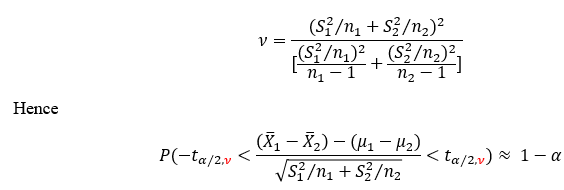

In [142]:
#모분산 모를때
from scipy import stats

# 주어진 데이터
mean_eng = 5  # 공대생 평균 독서량
mean_lib = 7  # 인문대생 평균 독서량
var_eng = 0.5  # 공대생 표본분산
var_lib = 2  # 인문대생 표본분산
n_eng = 10  # 공대생 수
n_lib = 11  # 인문대생 수
alpha = 0.05  # 유의수준

t_statistic, p_value = stats.ttest_ind_from_stats(mean1=mean_eng, std1=(var_eng ** 0.5), nobs1=n_eng,
                                                  mean2=mean_lib, std2=(var_lib ** 0.5), nobs2=n_lib)

# 결과 출력
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 유의수준과 비교하여 가설 판단
if p_value < alpha:
    print("귀무가설을 기각합니다. 공대생과 인문대생의 평균 독서량은 차이가 있다고 할 수 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 공대생과 인문대생의 평균 독서량은 차이가 없다고 할 수 있습니다.")

t-statistic: -4.0310
p-value: 0.0007
귀무가설을 기각합니다. 공대생과 인문대생의 평균 독서량은 차이가 있다고 할 수 있습니다.


### 두 가지 제품을 생산하는 공장 A와 B의 생산량에 대한 평균 비교를 위해 각각 20개의 표본을 조사했다. 데이터로 두 공장의 평균 생산량이 같은지를 유의수준 0.05에서 가설검정하시오. (모분산을 모른다고 가정)

In [143]:
from scipy import stats
import numpy as np

# 데이터 생성
np.random.seed(42)
factory_A = np.random.normal(loc=45, scale=8, size=20)
factory_B = np.random.normal(loc=40, scale=10, size=20)

# t-검정 수행
t_statistic, p_value = stats.ttest_ind(factory_A, factory_B)

# 결과 출력
print(f"t-검정 통계량: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("두 공장의 생산량에는 차이가 있다. 귀무가설을 기각합니다.")
else:
    print("두 공장의 생산량에는 차이가 없다. 귀무가설을 채택합니다.")

t-검정 통계량: 2.2762
p-value: 0.0286
두 공장의 생산량에는 차이가 있다. 귀무가설을 기각합니다.


# Non-parametric Tests

Wilcoxon Signed-Rank Test 예제:
Wilcoxon Signed-Rank Test는 두 관련 그룹 간의 차이를 검정하는 데 사용됩니다. 예를 들어, 동일한 개체 또는 짝을 이루는 데이터에서 두 가지 조건 간의 차이를 검정하는 데 유용합니다. 이 테스트는 데이터가 정규 분포를 따르지 않을 때 사용되며, 데이터 값이 서로 매우 관련되어 있을 때 유용합니다.

In [144]:
from scipy.stats import wilcoxon

# 예제 데이터
before = [28, 32, 25, 27, 30, 24, 26, 29, 31, 33]
after = [31, 35, 29, 30, 34, 28, 30, 32, 34, 36]

# Wilcoxon Signed-Rank Test 수행
statistic, p_value = wilcoxon(before, after)
print(f"검정 통계량: {statistic}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("차이가 있다. 귀무가설을 기각합니다.")
else:
    print("차이가 없다. 귀무가설을 채택합니다.")

검정 통계량: 0.0
p-value: 0.001953125
차이가 있다. 귀무가설을 기각합니다.


Wilcoxon Rank-Sum Test 예제:
Wilcoxon Rank-Sum Test는 두 독립된 그룹 간의 차이를 비교하는 데 사용됩니다. 이는 두 개의 독립된 그룹에서의 분포 차이를 비교할 때 유용합니다.

In [145]:
from scipy.stats import ranksums

# 예제 데이터
group1 = [28, 32, 25, 27, 30]
group2 = [31, 35, 29, 30, 34]

# Wilcoxon Rank-Sum Test 수행
statistic, p_value = ranksums(group1, group2)
print(f"검정 통계량: {statistic}")
print(f"p-value: {p_value}")

# 결과 해석
if p_value < 0.05:
    print("두 그룹은 서로 다르다. 귀무가설을 기각합니다.")
else:
    print("두 그룹은 서로 같다. 귀무가설을 채택합니다.")

검정 통계량: -1.6711454971746993
p-value: 0.09469294259947589
두 그룹은 서로 같다. 귀무가설을 채택합니다.
